# ANLY-590 Assignment 3
## Yingjie(Chelsea) Wang

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
# ===========================================
#  Importing model and core layers in Keras
# ==========================================
# Importing the sequential model in Keras
# Used as a linear stack of nn layers
from keras.models import Sequential, Model

# Importing core neural networks layers 
from keras.layers import Dense, Dropout, Activation, Flatten, Input, Conv2D, MaxPooling2D, UpSampling2D

# Tools for data transformation
from keras.utils import np_utils

# Load MNIST data
from keras.datasets import fashion_mnist
# optimizers
from keras.optimizers import SGD


Using TensorFlow backend.


## Question1: Autoencoder
A convolutional autoencoder is a particular flavor of autoencoder where we use convolutional layers instead of Dense layers. We have previously applied autoencoders to images using only Dense layers and the result worked fairly well. However, the local spatial correlations of images imply that we should be able to do better using convolutional layers instead of Dense layers.

Build and fit a convolutional autoencoder for the Fashion MNIST dataset. The components of this network will be many of the same pieces we've used with convolutional classification networks: Conv2D, MaxPooling, and so on. The encoder part of the network should run the input image through a few convolutional layers of your choice. The decoder part of the network will utilize UpSampling2D to get the representation back to the original image size.

An example to guide your thinking can be found toward the bottom of this post https://blog.keras.io/building-autoencoders-in-keras.html. DO NOT JUST COPY THIS CODE AND TURN IT IN. BE CREATIVE, COME UP WITH YOUR OWN VARIATION.

After training your network, visualize some examples of input images and their decoded reconstruction.

In [2]:
# Load pre-shuffled MNIST data into train and test sets
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
print(x_train.shape)
print(y_train.shape)

(60000, 28, 28)
(60000,)


In [3]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = np.reshape(x_train, (len(x_train), 28, 28, 1))  # adapt this if using `channels_first` image data format
x_test = np.reshape(x_test, (len(x_test), 28, 28, 1))  # adapt this if using `channels_first` image data format
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [4]:
input_img = Input(shape=(28, 28, 1))  # adapt this if using `channels_first` image data format

x = Conv2D(16, (5, 5), activation='relu', padding='same')(input_img)
print(x.shape)
encoded = MaxPooling2D((2, 2), padding='same')(x)
print(encoded.shape)
# at this point the representation is (4, 4, 8) i.e. 128-dimensional

x = Conv2D(8, (5, 5), activation='relu', padding='same')(encoded)
print(x.shape)
x = UpSampling2D((2, 2))(x)
print(x.shape)
decoded = Conv2D(1, (7, 7), activation='sigmoid', padding='same')(x)
print(decoded.shape)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

(None, 28, 28, 16)
(None, 14, 14, 16)
(None, 14, 14, 8)
(None, 28, 28, 8)
(None, 28, 28, 1)


In [5]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.3333 - val_loss: 0.2933
Epoch 2/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2822 - val_loss: 0.2854
Epoch 3/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2749 - val_loss: 0.2732
Epoch 4/10
60000/60000 [==============================] - 76s 1ms/step - loss: 0.2708 - val_loss: 0.2722
Epoch 5/10
60000/60000 [==============================] - 75s 1ms/step - loss: 0.2680 - val_loss: 0.2675
Epoch 6/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2658 - val_loss: 0.2668
Epoch 7/10
60000/60000 [==============================] - 87s 1ms/step - loss: 0.2645 - val_loss: 0.2648
Epoch 8/10
60000/60000 [==============================] - 85s 1ms/step - loss: 0.2635 - val_loss: 0.2649
Epoch 9/10
60000/60000 [==============================] - 84s 1ms/step - loss: 0.2626 - val_loss: 0.2654
Epoch

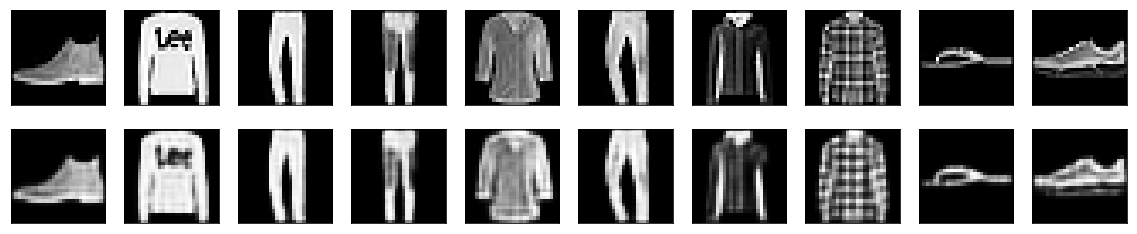

In [6]:
decoded_imgs = autoencoder.predict(x_test)

n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i+1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i+n+1)
    plt.imshow(decoded_imgs[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## Question2: Image Classification
We'll continue to use the Fashion MNIST dataset and build a deep convolutional network for classification.

### 2.1 Deep CNN
Build a deep CNN to classify the images. Provide a brief description of the architectural choices you've made: kernel sizes, strides, padding, network depth. Train your network end-to-end. Report on your model's performance on training set and test set.

Brief description of the architectural choices:
- CNN input layer: input_shape: (depth=28, width=28, height=1)
- CNN convolution: 
    - layer 1: 
        - number of filters: 32 (numbers of filters that convolutional layers will learn from)
        - kernel sizes: 5*5 (strides: 1)
        - activation: relu
        - padding: same (preserve spatial dimensions of the volume such that the output volume size matches the input volume size)
        - maxpooling size: 2*2 (strides: 2)
    - layer 2:
        - number of filters: 64 (numbers of filters that convolutional layers will learn from)
        - kernel sizes: 5*5 (strides: 1)
        - activation: relu
        - padding: same (preserve spatial dimensions of the volume such that the output volume size matches the input volume size)
        - maxpooling size: 2*2 (strides: 2)
    - After flatten
    - fully connected layer 1
        - 7*7*64=3136 nodes
    - fully connected layer 2
        - 500 nodes
    - output layer
        - 10 nodes
        

In [7]:
# We do this through one-hot encoding
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
# Check the shape
print(Y_train.shape)
print(Y_test.shape)

(60000, 10)
(10000, 10)


In [8]:
# =============================
#  Setting up the Architecture
# ============================
# Declaring sequential model
model = Sequential()
model.add(Conv2D(32, kernel_size=(5, 5), strides=(1, 1),
                 activation='relu', padding='same',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(64, (5, 5), strides=(1, 1), 
                 activation='relu', padding='same',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Conv2D(128, (5, 5), strides=(1, 1), 
                 activation='relu', padding='same',
                 input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2), strides=(2, 2)))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dense(10, activation='softmax'))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 14, 14, 64)        51264     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 7, 7, 128)         204928    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 3, 3, 128)         0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1152)             

In [9]:
# =====================
#  Compiling the model
# =====================
model.compile(loss='categorical_crossentropy', 
              optimizer='SGD',
              metrics=['accuracy'])

# ===================
# Fitting the model
# ===================
model.fit(x_train, Y_train,
          epochs = 10,
          batch_size = 128,
          verbose = 1,
          validation_data = (x_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 100s 2ms/step - loss: 1.2076 - accuracy: 0.5945 - val_loss: 0.7931 - val_accuracy: 0.7157
Epoch 2/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.6838 - accuracy: 0.7491 - val_loss: 0.6509 - val_accuracy: 0.7574
Epoch 3/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.5914 - accuracy: 0.7837 - val_loss: 0.5882 - val_accuracy: 0.7821 -
Epoch 4/10
60000/60000 [==============================] - 100s 2ms/step - loss: 0.5316 - accuracy: 0.8060 - val_loss: 0.5276 - val_accuracy: 0.8050
Epoch 5/10
60000/60000 [==============================] - 106s 2ms/step - loss: 0.4885 - accuracy: 0.8214 - val_loss: 0.5043 - val_accuracy: 0.8172
Epoch 6/10
60000/60000 [==============================] - 118s 2ms/step - loss: 0.4540 - accuracy: 0.8357 - val_loss: 0.4659 - val_accuracy: 0.8296
Epoch 7/10
60000/60000 [==============================] - 11

### 2.2 Transfer Learning
Repeat the same task, but this time utilize a pre-trained network for the majority of your model. You should only train the final Dense layer, all other weights should be fixed. You can use whichever pre-trained backbone you like (ResNet, VGG, etc). Report on your model's performance on training set and test set.

In [10]:
from keras.applications import VGG19
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from keras.datasets import fashion_mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten

In [11]:
vgg19 = VGG19(weights="imagenet", include_top=False, input_shape=(32,32,3))

In [12]:
pretrained_model = Sequential()
pretrained_model.add(vgg19)
pretrained_model.add(Flatten())
pretrained_model.add(Dense(500, activation='relu'))
pretrained_model.add(Dense(10, activation='softmax'))
print(pretrained_model.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 1, 1, 512)         20024384  
_________________________________________________________________
flatten_2 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 500)               256500    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5010      
Total params: 20,285,894
Trainable params: 20,285,894
Non-trainable params: 0
_________________________________________________________________
None


In [13]:
vgg19.trainable = False
pretrained_model.trainable_weights
pretrained_model.compile(loss='categorical_crossentropy', optimizer='SGD', metrics=['accuracy'])

In [14]:
# Duplicate images in 3 channels
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

x_train = np.dstack([x_train] * 3)
x_test = np.dstack([x_test] * 3)

x_train = x_train.reshape(-1, 28, 28, 3)
x_test = x_test.reshape (-1, 28, 28, 3)
x_train = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_train])/255.
x_test = np.asarray([img_to_array(array_to_img(im, scale=False).resize((32,32))) for im in x_test])/255.

print(x_train.shape) 
print(x_test.shape)

(60000, 32, 32, 3)
(10000, 32, 32, 3)


In [15]:
pretrained_model.fit(x_train, Y_train,
                     epochs = 10,
                     batch_size = 128, 
                     verbose = 1,
                     validation_data = (x_test, Y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 381s 6ms/step - loss: 1.2497 - accuracy: 0.6253 - val_loss: 0.9423 - val_accuracy: 0.6946
Epoch 2/10
60000/60000 [==============================] - 380s 6ms/step - loss: 0.8639 - accuracy: 0.7112 - val_loss: 0.8156 - val_accuracy: 0.7192
Epoch 3/10
60000/60000 [==============================] - 375s 6ms/step - loss: 0.7781 - accuracy: 0.7316 - val_loss: 0.7570 - val_accuracy: 0.7363
Epoch 4/10
60000/60000 [==============================] - 368s 6ms/step - loss: 0.7310 - accuracy: 0.7443 - val_loss: 0.7233 - val_accuracy: 0.7474
Epoch 5/10
60000/60000 [==============================] - 355s 6ms/step - loss: 0.7000 - accuracy: 0.7558 - val_loss: 0.7007 - val_accuracy: 0.7564
Epoch 6/10
60000/60000 [==============================] - 442s 7ms/step - loss: 0.6771 - accuracy: 0.7617 - val_loss: 0.6795 - val_accuracy: 0.7644
Epoch 7/10
60000/60000 [==============================] - 453s

The original model last epoch: val_loss: 0.3947 - val_accuracy: 0.8557

The pretrained model last epoch: val_loss: 0.6367 - val_accuracy: 0.7718

Therefore, the pretrained model doesn't improve the performance in this problem.

# Question 3: Text Classification
While images contain local spatial correlations and structure, many other datasets contain temporal correlations. Examples include time series and discrete sequences such as text. In this problem, we will tackle the task of text classification in the context of natural language.

Background. In this problem, we will build models that read short text segments (tweets) and identify if one or more specific topics are being discussed.

Dataset. The dataset consists of tweets along with labels for which topics were being referenced in the tweet. Examples of the topics include "storms", "rain", "hurricane", "snow" and so on. Unlike previous classification problems we have encountered, in this dataset, there is not just a single right answer. The labels here are derived from multiple annotators decided how to label each tweet, so a single tweet can be about more than one topic. The label is the fraction of annotations for a given topic, and each row should sum to 1.

What Loss function should you use here? Categorical CrossEntropy might work, but with some modification since we don't have "hard" labels over the categories. Another option might be sigmoid: for each output category, use a sigmoid to collapse the output to between 0 and 1, but each category output can be roughly independent of the others. In the problems below, feel free to
try both.

In [16]:
df_tweets = pd.read_table('tweets_with_labels.csv')
df_tweets.head()

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
1,2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0
4,9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0


In [17]:
import re
import string
import nltk
nltk.download('punkt')
nltk.download('stopwords')
from nltk.tokenize import TweetTokenizer
from nltk.corpus import stopwords

# clean tweet to help with statistics
def processTweet(tweet):
    # Emoji patterns
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)

    # Remove url
    tweet = re.sub(r'((www\.[^\s]+)|(https?://[^\s]+))', '', tweet)
    # remove RT
    tweet = re.sub(r'^RT[\s]+', '', tweet)
    # Remove hashtags
    # only removing the hash # sign from the word, we believe hashtags contains useful information
    tweet = re.sub(r'#', '', tweet)
    # Remove HTML special entities (e.g. amp;)
    tweet = re.sub(r'\\w*;', '', tweet)
    # remove stock market tickers like $GE
    tweet = re.sub(r'\$\w*', '', tweet)
    # convert @username to AT_USER
    tweet = re.sub('@[^\s]+', '', tweet)
    # remove mentions
    tweet = re.sub(r':', '', tweet)
    tweet = re.sub(r'‚Ä¶', '', tweet)
    # replace consecutive non-ASCII characters with a space
    tweet = re.sub(r'[^\x00-\x7F]+', ' ', tweet)
    # remove emojis from tweet
    tweet = emoji_pattern.sub(r'', tweet)

    return tweet

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chels\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chels\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [18]:
df_tweets['clean_text'] = df_tweets['tweet'].apply(processTweet)
df_tweets['token'] = df_tweets['clean_text'].apply(TweetTokenizer().tokenize)\
        .apply(lambda x: [item for item in x if item.isalpha()])
df_tweets.head(10)

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,clean_text,token
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.000,Jazz for a Rainy Afternoon {link},"[Jazz, for, a, Rainy, Afternoon, link]"
1,2,RT: @mention: I love rainy days.,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.000,RT I love rainy days.,"[RT, I, love, rainy, days]"
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.000,0.000,0.000,0.000,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,Good Morning Chicago! Time to kick the Windy C...,"[Good, Morning, Chicago, Time, to, kick, the, ..."
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.000,0.000,0.000,0.000,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.000,Preach lol! ) RT alliwantis this type of weat...,"[Preach, lol, RT, alliwantis, this, type, of, ..."
4,9,@mention good morning sunshine,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.000,good morning sunshine,"[good, morning, sunshine]"
5,10,Rather be storm chasing.,0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,1.0,0.000,0.0,0.000,Rather be storm chasing.,"[Rather, be, storm, chasing]"
6,11,#WEATHER: 1:54 pm : 61.0F. Feels 60F. 29.98% ...,0.0,0.203,0.176,0.000,0.376,0.0,0.421,0.0,0.176,0.0,0.0,0.0,0.000,0.0,0.579,WEATHER 154 pm 61.0F. Feels 60F. 29.98% Humi...,"[WEATHER, pm, F, Feels, Humidity, MPH, East, W..."
7,13,Father. Son. Holy ghost. Amen... hope I come o...,0.0,0.000,0.000,1.000,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.000,Father. Son. Holy ghost. Amen... hope I come o...,"[Father, Son, Holy, ghost, Amen, hope, I, come..."
8,14,Mild Monday best weather day of the week in Ok...,0.0,0.000,0.000,0.194,0.000,0.0,0.605,0.0,0.200,0.0,0.0,0.0,0.000,0.0,0.000,Mild Monday best weather day of the week in Ok...,"[Mild, Monday, best, weather, day, of, the, we..."
9,15,"With the snow forecast for Tahoe this weekend,...",0.0,0.000,0.000,0.000,0.000,0.0,0.000,0.0,0.000,0.0,1.0,0.0,0.000,0.0,0.000,"With the snow forecast for Tahoe this weekend,...","[With, the, snow, forecast, for, Tahoe, this, ..."


In [19]:
def sequence(word_tokens):
    filtered_tweet = []
    stop_words = set(stopwords.words('english')+ ['RT', 'via'])
    punctuation = list(string.punctuation)
    for w in word_tokens:
        if w not in punctuation and w not in stop_words:
            filtered_tweet.append(w.lower())
    return ' '.join(filtered_tweet)

In [20]:
df_tweets['sequence'] = df_tweets['token'].apply(sequence)
df_tweets.head()

,id,tweet,k1,k2,k3,k4,k5,k6,k7,k8,k9,k10,k11,k12,k13,k14,k15,clean_text,token,sequence
0,1,Jazz for a Rainy Afternoon: {link},0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0,Jazz for a Rainy Afternoon {link},"[Jazz, for, a, Rainy, Afternoon, link]",jazz rainy afternoon link
1,2,RT: @mention: I love rainy days.,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,1.0,0.0,0.0,0.000,0.0,0.0,RT I love rainy days.,"[RT, I, love, rainy, days]",i love rainy days
2,3,Good Morning Chicago! Time to kick the Windy C...,0.0,0.0,0.0,0.0,0.0,0.0,1.000,0.0,0.000,0.0,0.0,0.0,0.000,0.0,0.0,Good Morning Chicago! Time to kick the Windy C...,"[Good, Morning, Chicago, Time, to, kick, the, ...",good morning chicago time kick windy city nuts...
3,6,Preach lol! :) RT @mention: #alliwantis this t...,0.0,0.0,0.0,0.0,0.0,0.0,0.604,0.0,0.196,0.0,0.0,0.0,0.201,0.0,0.0,Preach lol! ) RT alliwantis this type of weat...,"[Preach, lol, RT, alliwantis, this, type, of, ...",preach lol alliwantis type weather time i live...
4,9,@mention good morning sunshine,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.0,0.000,0.0,0.0,0.0,1.000,0.0,0.0,good morning sunshine,"[good, morning, sunshine]",good morning sunshine


In [21]:
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import SimpleRNN, Embedding

tokenizer = Tokenizer(num_words=1000, lower=True)
tokenizer.fit_on_texts(df_tweets['sequence'])
sequences = tokenizer.texts_to_sequences(df_tweets['sequence'])
x = pad_sequences(sequences, maxlen=180)
y = df_tweets[df_tweets.columns[2:17]]
print(x.shape)
print(y.shape)

(77946, 180)
(77946, 15)


### 3.1 RNN
Build and train a Recurrent Neural Network to solve this text classification task. You can use any type of RNN you wish (SimpleRNN, GRU, LSTM).

In [22]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [23]:
from keras.layers import SimpleRNN, Embedding
model_rnn = Sequential()
model_rnn.add(Embedding(1500, 64))
model_rnn.add(SimpleRNN(32))
model_rnn.add(Dense(15, activation='sigmoid'))
model_rnn.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])

In [24]:
model_rnn.fit(x_train, 
              y_train, 
              epochs = 5,
              batch_size = 128, 
              validation_data=(x_test, y_test))

c:\users\chels\appdata\local\programs\python\python36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 62356 samples, validate on 15590 samples
Epoch 1/5
62356/62356 [==============================] - 34s 548us/step - loss: 0.2211 - acc: 0.8771 - val_loss: 0.1511 - val_acc: 0.8994
Epoch 2/5
62356/62356 [==============================] - 37s 597us/step - loss: 0.1363 - acc: 0.9045 - val_loss: 0.1249 - val_acc: 0.9078loss: 0.1368  - ETA: 0s - loss: 0.1365 - ac
Epoch 3/5
62356/62356 [==============================] - 37s 590us/step - loss: 0.1190 - acc: 0.9092 - val_loss: 0.1153 - val_acc: 0.9101
Epoch 4/5
62356/62356 [==============================] - 36s 570us/step - loss: 0.1124 - acc: 0.9106 - val_loss: 0.1101 - val_acc: 0.9110
Epoch 5/5
62356/62356 [==============================] - 38s 607us/step - loss: 0.1090 - acc: 0.9111 - val_loss: 0.1079 - val_acc: 0.9115


In [25]:
from keras.layers import Dense, LSTM, GRU
model_lstm = Sequential()
model_lstm.add(Embedding(1500, 180))
model_lstm.add(LSTM(64))
model_lstm.add(Dense(15,activation='softmax'))
model_lstm.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
model_lstm.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 180)         270000    
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                62720     
_________________________________________________________________
dense_6 (Dense)              (None, 15)                975       
Total params: 333,695
Trainable params: 333,695
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_lstm.fit(x_train, 
               y_train,
               epochs = 5, 
               batch_size = 128,
               verbose= 1 ,
               validation_data=(x_test, y_test))

c:\users\chels\appdata\local\programs\python\python36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 62356 samples, validate on 15590 samples
Epoch 1/5
62356/62356 [==============================] - 228s 4ms/step - loss: 0.1409 - accuracy: 0.9001 - val_loss: 0.1103 - val_accuracy: 0.9089
Epoch 2/5
62356/62356 [==============================] - 228s 4ms/step - loss: 0.1076 - accuracy: 0.9093 - val_loss: 0.1066 - val_accuracy: 0.9098
Epoch 3/5
62356/62356 [==============================] - 225s 4ms/step - loss: 0.1041 - accuracy: 0.9096 - val_loss: 0.1041 - val_accuracy: 0.9099
Epoch 4/5
62356/62356 [==============================] - 234s 4ms/step - loss: 0.1025 - accuracy: 0.9098 - val_loss: 0.1031 - val_accuracy: 0.9099
Epoch 5/5
62356/62356 [==============================] - 242s 4ms/step - loss: 0.1014 - accuracy: 0.9099 - val_loss: 0.1035 - val_accuracy: 0.9098


Simple RNN model last epoch: val_loss: 0.1079 - val_acc: 0.9115

LSTM model last epoch: val_loss: 0.1035 - val_accuracy: 0.9098

Therefore for the same training set, simple RNN and LSTM have similar performance on this task.

### 3.2 CNN
Build and train a 1D CNN for this text classification task. We recommend you do a character-level convolution (with character embeddings). You might gain some insight and inspiration from these text classification approaches:
- http://www.aclweb.org/anthology/D14-1181
- https://arxiv.org/abs/1702.08568

In [27]:
from keras.layers import Conv1D
model_cnn = Sequential()
model_cnn.add(Embedding(10000, input_length = 180, output_dim = 128))
model_cnn.add(Conv1D(128, 3,activation='relu'))
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv1D(64, 3, activation='relu'))
model_cnn.add(Dropout(0.5))
model_cnn.add(Conv1D(32, 3, activation='relu'))
model_cnn.add(Flatten())   
model_cnn.add(Dense(256, activation ='relu'))
model_cnn.add(Dense(15, activation ='sigmoid'))
model_cnn.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy',metrics=['acc'])
model_cnn.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 180, 128)          1280000   
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 178, 128)          49280     
_________________________________________________________________
dropout_1 (Dropout)          (None, 178, 128)          0         
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 176, 64)           24640     
_________________________________________________________________
dropout_2 (Dropout)          (None, 176, 64)           0         
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 174, 32)           6176      
_________________________________________________________________
flatten_3 (Flatten)          (None, 5568)             

In [28]:
model_cnn.fit(x_train, 
              y_train,
              epochs = 5, 
              batch_size = 128, 
              verbose = 1,
              validation_data=(x_test, y_test))

c:\users\chels\appdata\local\programs\python\python36\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 62356 samples, validate on 15590 samples
Epoch 1/5
62356/62356 [==============================] - 140s 2ms/step - loss: 0.1767 - acc: 0.8896 - val_loss: 0.1480 - val_acc: 0.8985
Epoch 2/5
62356/62356 [==============================] - 136s 2ms/step - loss: 0.1234 - acc: 0.9073 - val_loss: 0.1150 - val_acc: 0.9103
Epoch 3/5
62356/62356 [==============================] - 129s 2ms/step - loss: 0.1123 - acc: 0.9103 - val_loss: 0.1072 - val_acc: 0.9115
Epoch 4/5
62356/62356 [==============================] - 136s 2ms/step - loss: 0.1074 - acc: 0.9113 - val_loss: 0.1048 - val_acc: 0.9119
Epoch 5/5
62356/62356 [==============================] - 135s 2ms/step - loss: 0.1048 - acc: 0.9117 - val_loss: 0.1034 - val_acc: 0.9122


Simple RNN model last epoch: val_loss: 0.1079 - val_acc: 0.9115

LSTM model last epoch: val_loss: 0.1035 - val_accuracy: 0.9098

CNN model last epoch: val_loss: 0.1034 - val_acc: 0.9122

Overall, CNN model perform slightly better than simple RNN and LSTM.

### 3.3 
Be sure to directly compare your two methods with an ROC curve or similar validation method. Don't forget to create a train-test split.

In [29]:
from sklearn.metrics import roc_curve, auc
y_test_actual = [np.argmax(np.array(y_test.iloc[i])) for i in range(len(y_test))]
y_pred_rnn = model_rnn.predict_classes(x_test)
y_pred_lstm = model_lstm.predict_classes(x_test)
y_pred_cnn = model_cnn.predict_classes(x_test)

In [30]:
from sklearn import preprocessing
lb = preprocessing.LabelBinarizer()
lb.fit(y_test_actual)
y_test_transform = lb.transform(y_test_actual)
y_pred_rnn = lb.transform(y_pred_rnn)
y_pred_lstm = lb.transform(y_pred_lstm)
y_pred_cnn = lb.transform(y_pred_cnn)

In [31]:
print(y_pred_rnn.shape)

(15590, 15)


In [32]:
fpr_rnn = dict()
tpr_rnn = dict()
roc_auc_rnn = dict()
for i in range(15):
    fpr_rnn[i], tpr_rnn[i], _ = roc_curve(y_test_transform[:, i], y_pred_rnn[:, i])
    roc_auc_rnn[i] = auc(fpr_rnn[i], tpr_rnn[i])

In [33]:
fpr_lstm = dict()
tpr_lstm = dict()
roc_auc_lstm = dict()
for i in range(15):
    fpr_lstm[i], tpr_lstm[i], _ = roc_curve(y_test_transform[:, i], y_pred_lstm[:, i])
    roc_auc_lstm[i] = auc(fpr_lstm[i], tpr_lstm[i])

In [34]:
fpr_cnn = dict()
tpr_cnn = dict()
roc_auc_cnn = dict()
for i in range(15):
    fpr_cnn[i], tpr_cnn[i], _ = roc_curve(y_test_transform[:, i], y_pred_cnn[:, i])
    roc_auc_cnn[i] = auc(fpr_cnn[i], tpr_cnn[i])

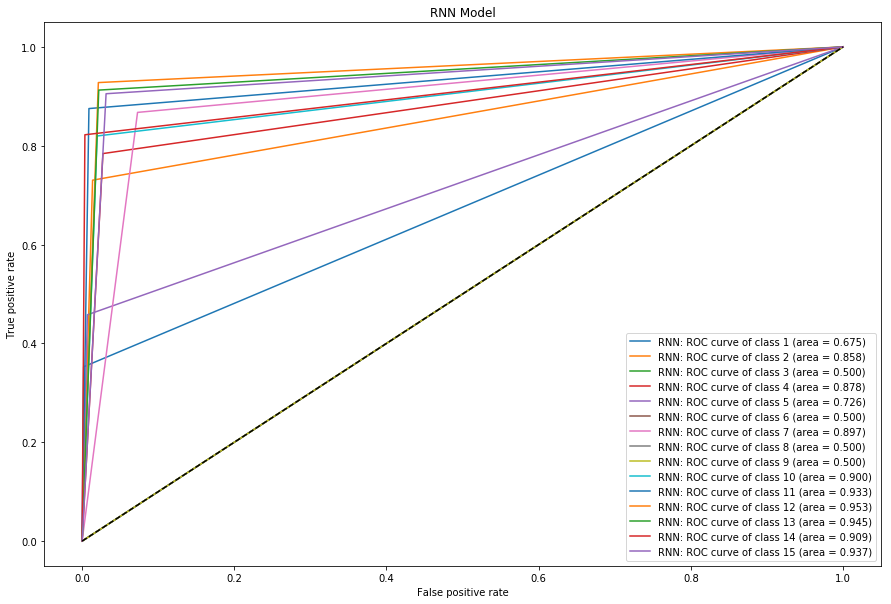

In [35]:
plt.figure(figsize=(15,10))
for i in range(15):
    plt.plot(fpr_rnn[i], tpr_rnn[i],
             label='RNN: ROC curve of class {0} (area = {1:0.3f})'''.format(i+1, roc_auc_rnn[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RNN Model')
plt.legend(loc="best")
plt.show()

For simple RNN model, 

The model does a better job classifying class rain, snow, storms, sun, tornado and wind. 

However, it does a poor job classifying class clouds, ice and other.

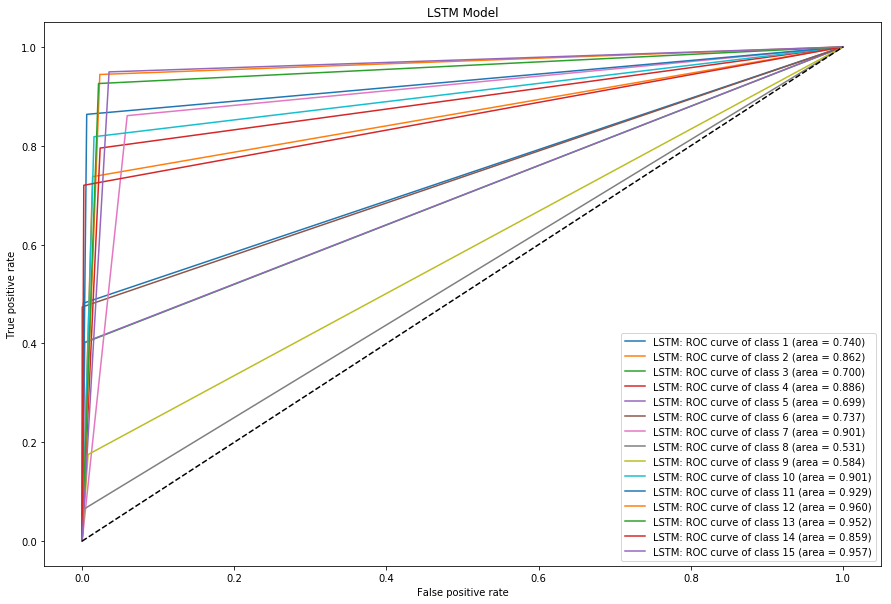

In [36]:
plt.figure(figsize=(15,10))
for i in range(15):
    plt.plot(fpr_lstm[i], tpr_lstm[i],
             label='LSTM: ROC curve of class {0} (area = {1:0.3f})'''.format(i+1, roc_auc_lstm[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('LSTM Model')
plt.legend(loc="best")
plt.show()

For simple LSTM model, 

The model does a better job classifying class I can't tell, rain, snow, storms, sun and wind. 

However, it does a poor job classifying class humid, ice and other.


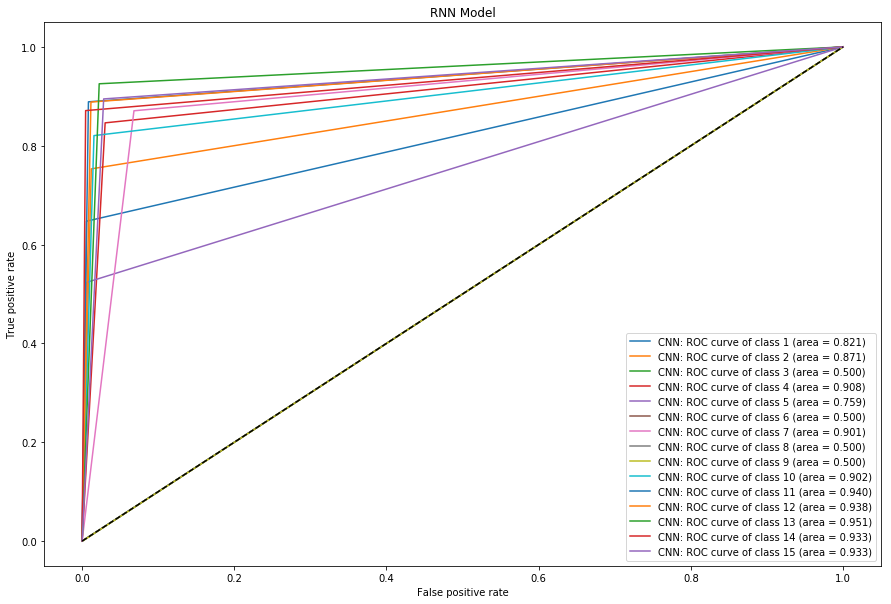

In [37]:
plt.figure(figsize=(15,10))
for i in range(15):
    plt.plot(fpr_cnn[i], tpr_cnn[i],
             label='CNN: ROC curve of class {0} (area = {1:0.3f})'''.format(i+1, roc_auc_cnn[i]))
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('RNN Model')
plt.legend(loc="best")
plt.show()

For simple CNN model, 

The model does a better job classifying class hot, I can't tell, rain, snow, storms, sun, tornado and wind. 

However, it does a poor job classifying class dry, hurricane, ice and other.


Overall, class rain, snow, storm, sun and wind are relatively easy to identify; class ice and snow are relative hard to identify.